In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import random
import time

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
table = pd.read_excel('DDI data availability.xlsx','DDI_yes', index_col=None, header=None)


In [5]:
cyt = np.asarray(table.loc[[1]])[0][23:]

In [6]:
req = table[[0, 1]]
for i in cyt:
    req[f'{i}'] = req[0]+ ' ' + req[1]+ ' ' + i
req = req[2:]

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
req[2] = req[0]+ ' ' + req[1]+ ' ' + 'cytochrome'

In [9]:
cor_clean = pd.read_excel('drug_yes.xlsx', index_col = 0)

In [10]:
cor_clean

,drug,CYP_l,CYP1A2_l,CYP3A4_l,CYP2C8_l,CYP2C9_l,cytochrome,CYP1A2,CYP3A4,CYP2C8,CYP2C9
2,OPICAPONE,0,0,0,0,0,60,20,39,19,16
3,OZANIMOD,2,0,1,0,0,51,4,22,8,9
4,AMISULPRIDE,0,0,0,0,0,1450,332,541,80,942
5,REMIMAZOLAM,0,0,0,0,0,29,5,16,3,7
6,ARTESUNATE,0,0,0,0,0,4830,1070,1640,1050,1730
7,OSILODROSTAT,3,0,1,0,0,51,18,32,8,19
8,LURBINECTEDIN,1,0,1,0,0,62,3,25,5,8
9,TAZEMETOSTAT,2,0,1,0,0,47,5,28,5,7
10,TRIHEPTANOIN,0,0,0,0,0,153,1,12,2,4
11,CEDAZURIDINE,0,0,0,0,0,4,1,2,1,1


In [30]:
pubmed=[]
c = 0
for i in cor_clean['drug']:
    r = requests.get('https://pubmed.ncbi.nlm.nih.gov/?term=' + i + '+&filter=simsearch1.fha')
    soup=BeautifulSoup(r.content,'lxml') 
    start = str(soup).find('Table representation of search results timeline featuring number of search results per year.')
    end = str(soup)[start:].find(' </td')
    res = str(soup)[start+end-4: start+end]
    if res != 'html':
        pubmed.append(res)
    else:
    c+=1
    if c % 10 == 0:
        print(c, str(soup)[start+end-4: start+end])

10 2006
20 2006
30 2006
40 2006
50 2003
60 1995
70 2011
80 1983
90 2004
100 1957
110 1985
120 2002
130 1971
140 1988
150 1990
160 1980
170 1980
180 1997
190 1987
200 1974
210 1985
220 1989
230 1981
240 1991
250 2006
260 2005
270 1994
280 1985
290 2005
300 1993
310 1993
320 2006
330 1979
340 1976
350 1975
360 1979
370 1978
380 1947
390 1957
400 1950
410 1982
420 2006
430 2006
440 2006
450 1981
460 html
470 1995
480 2001
490 1981
500 1991
510 1993
520 2003
530 1957
540 1972
550 1971
560 1942
570 1975
580 1964
590 1982
600 1980
610 1975
620 2011
630 html
640 1994
650 1978
660 1988
670 1973
680 1975
690 1970
700 1966
710 1970
720 1966
730 1963
740 1969
750 1963
760 1963
770 1975
780 1950
790 2002
800 1963
810 1955
820 1971


In [108]:
def pub(x, y=0):
    if y != 0:
        r = requests.get(f'https://pubmed.ncbi.nlm.nih.gov/?term=%28{x}%29+AND+%28substrate%29+AND+%28cytochrome%29&filter=simsearch1.fha&filter=simsearch3.fft')
    else:
        r = requests.get('https://pubmed.ncbi.nlm.nih.gov/?term=' + x + '+&filter=simsearch1.fha')
    soup=BeautifulSoup(r.content,'lxml') 
    start = str(soup).find('Table representation of search results timeline featuring number of search results per year.')
    end = str(soup)[start:].find(' </td')
    res = str(soup)[start+end-4: start+end]
    if res == 'html':
        if str(soup).find('No results were found.'):
            return 0, 0
        else:
            pub(x)
            
    
    a = str(soup)[str(soup).find('<div class="results-amount">'):]
    count = a[a.find('"value">')+8:a.find('</span>')].replace(',', '')
    return res, count

In [112]:
pubmed=[]
pubmed_count=[]
c = 0
for i in cor_clean['drug']:
    #if pub(i) != 'html':
    res = pub(i, y=1)
    pubmed.append(res[0])
    pubmed_count.append(res[1])
    c+=1 
    if c%10 == 0:
        print(c)
    #else:
        #print(shit)
        

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820


In [99]:
cor_clean['year_cyt']=list(map(int, pubmed))
cor_clean['count_pubmed_cyt'] = list(map(int, pubmed_count))

In [115]:
np.save('pubmed_count_cyt.npy', pubmed_count)

(1900, 2100)

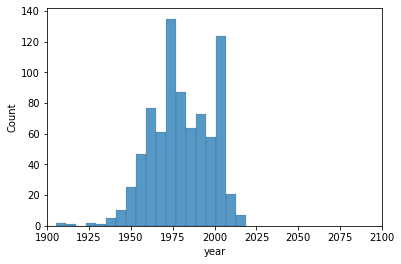

In [96]:
sns.histplot(data=cor_clean, x='year')
plt.xlim(1900, 2100)

In [97]:
cor_clean.to_csv('cor_clean_pubmed.csv')